In [ ]:
# Medical Insurance Cost Analysis

In [ ]:
# Problem Statement
# Understand factors influencing medical insurance charges
# Analyze impact of smoking, age, BMI, and gender on costs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style='whitegrid')

In [3]:
df= pd.read_csv("/content/medical-charges.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
df.shape

(1338, 7)

In [10]:
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].astype('category')


In [11]:
#Age Distribution
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 25, 40, 60,  100],
    labels=["Young Adult", "Adult", "Middle Age", "Senior"])


In [12]:
#bmi category
def bmi_category(bmi) :
  if bmi < 18.5 :
    return 'underweight'
  elif bmi < 25 :
    return 'normal'
  elif bmi < 30 :
    return 'overweight'
  else:
    return 'obese'



In [13]:
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [14]:
#FAMILY SIZE
df['family_size'] = df['children'] +1


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,family_size
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,overweight,1
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,obese,2
2,28,male,33.000,3,no,southeast,4449.46200,Adult,obese,4
3,33,male,22.705,0,no,northwest,21984.47061,Adult,normal,1
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,1


In [16]:
#AVERAGE CHARGES BY BMI AND SMOKERS
df.groupby(['bmi_category','smoker'])['charges'].mean()

/tmp/ipython-input-65870152.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['bmi_category','smoker'])['charges'].mean()


bmi_category  smoker
normal        no         7685.656014
              yes       19942.223641
obese         no         8842.691548
              yes       41557.989840
overweight    no         8257.961955
              yes       22495.874163
underweight   no         5532.992453
              yes       18809.824980
Name: charges, dtype: float64

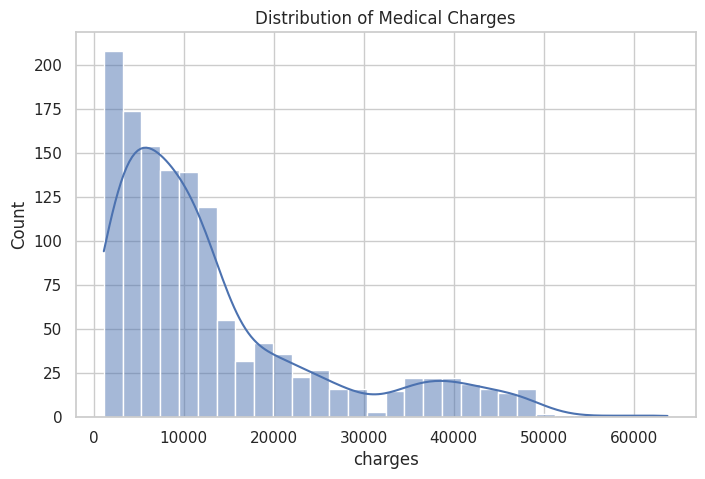

In [17]:
#DISTRIBUTION OF CHARGES
plt.figure(figsize=(8,5))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()


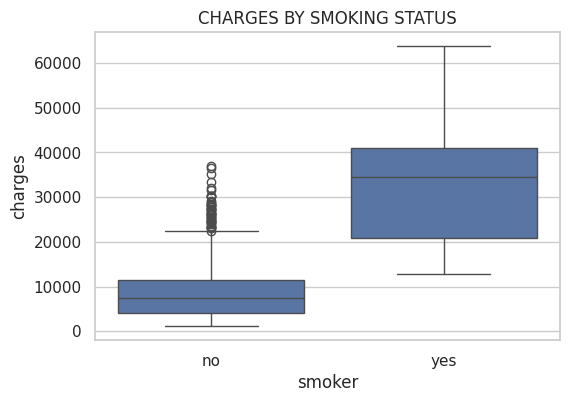

In [18]:
#CHARGES BY SMOKING STATUS
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('CHARGES BY SMOKING STATUS')
plt.show()

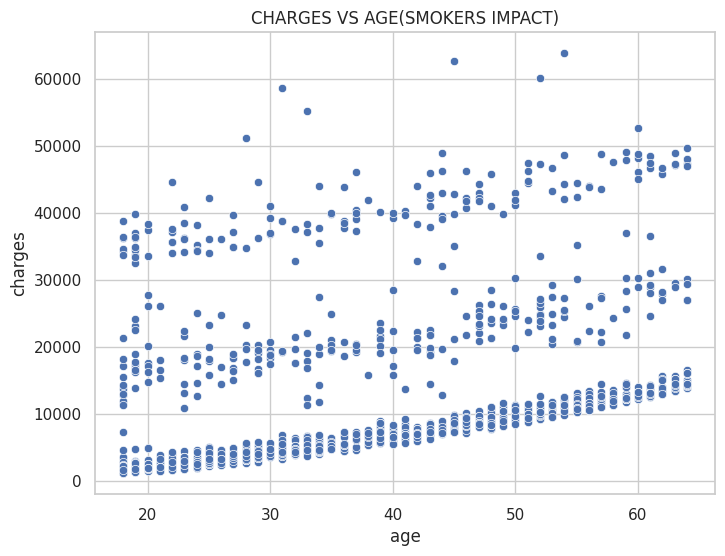

In [19]:
#CHARGES VS AGE
plt.figure(figsize=(8,6))
sns.scatterplot(x='age' ,y='charges' ,data=df)
plt.title('CHARGES VS AGE(SMOKERS IMPACT)')
plt.show()

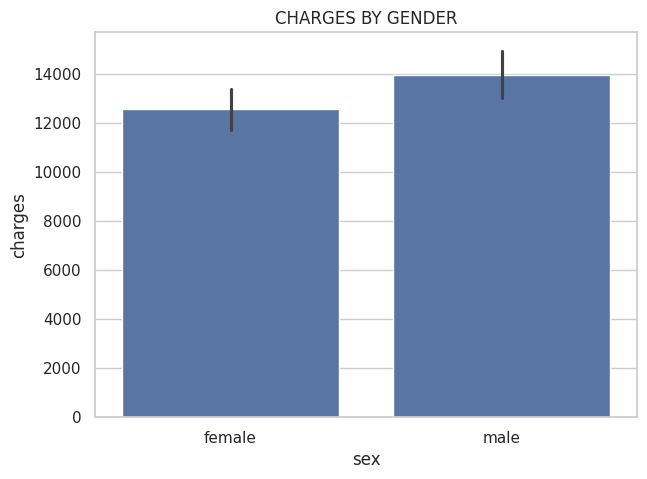

In [20]:
# CHARGES VS SEX
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='charges', data = df)
plt.title('CHARGES BY GENDER')
plt.show()


/tmp/ipython-input-3454926987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, palette='coolwarm')


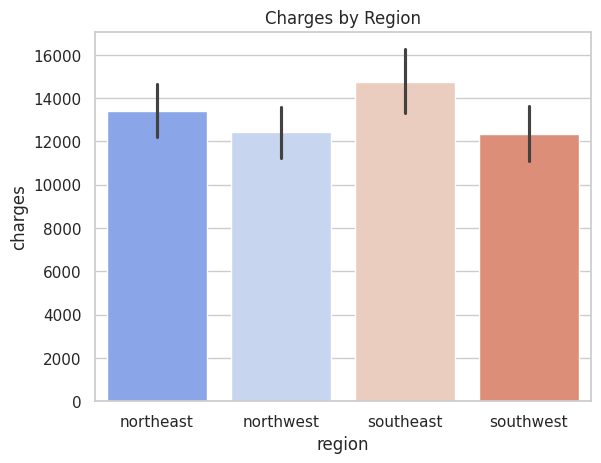

In [21]:
#CHARGES VS REGION
plt.figure()
sns.barplot(x='region', y='charges', data=df, palette='coolwarm')
plt.title("Charges by Region")
plt.show()


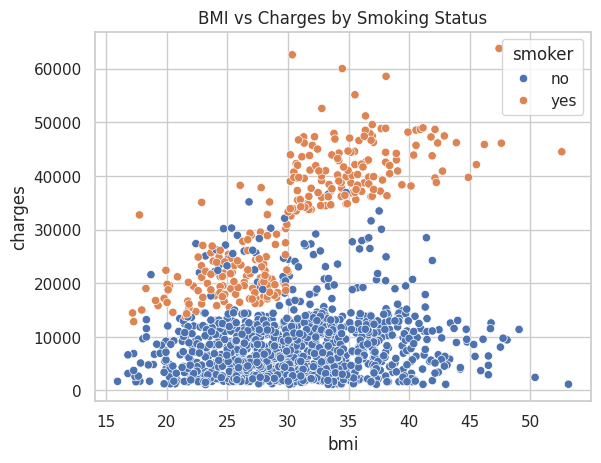

In [22]:
#BMI VS CHARGES AS PER SMOKING STATUS
plt.figure()
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges by Smoking Status")
plt.show()


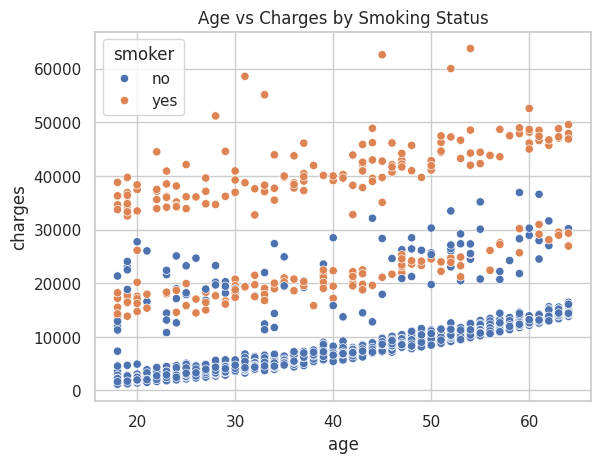

In [23]:
#AGE VS CHARGES AS PER THE SMOKING STATUS
plt.figure()
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs Charges by Smoking Status")
plt.show()


In [24]:
#SMOKER VS NON-SMOKER CHARGES
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges)
t_stat, p_value


(np.float64(46.66492117272371), np.float64(8.271435842179102e-283))

In [ ]:
#Key Insights
# Smokers incur 3–4x higher medical costs than non-smokers
# Obese smokers represent the highest risk group
# Age increases costs gradually; smoking causes exponential increase
# Region has minimal impact on insurance charges

In [25]:
df.to_csv("cleaned_medical_data.csv", index=False, encoding='utf-8-sig', sep=',')


In [26]:
from google.colab import files
files.download("cleaned_medical_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>